<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Цель спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

Задача найти баланс классов, обучить модель без учёта дисбаланса и найдите лучшую.

Признаки

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Целевой признак

Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#scaler = StandardScaler()
#numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
#scaler.fit(df[numeric])
#df[numeric] = scaler.transform(df[numeric])

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns = ['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited']     

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   creditscore       10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_crcard        10000 non-null  int64  
 11  isactive_member   10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

row_number            0
customer_id           0
surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_crcard            0
isactive_member       0
estimated_salary      0
exited                0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [12]:
df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [13]:
clean_data = df.drop(['row_number', 'customer_id', 'surname'], axis=1).copy()

In [14]:
#clean_data = pd.concat([clean_data, gender_ohe, country_ohe], axis=1)

In [15]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   creditscore       10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_crcard        10000 non-null  int64  
 8   isactive_member   10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [16]:
clean_data['tenure'].median()

5.0

In [17]:
clean_data['tenure'] = clean_data['tenure'].fillna(5.0)

In [18]:
clean_data

,creditscore,geography,gender,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Дубликатов нет.

Столбец row_number, surname,customer_id  удалили так как в них нету пользы

## Исследование задачи

In [19]:
features = clean_data.drop(['exited'], axis=1)
target = clean_data['exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, train_size=0.6, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)
gender_ohe = pd.get_dummies(clean_data['gender'], drop_first=True)
country_ohe = pd.get_dummies(clean_data['geography'], drop_first=True)

clean_data.drop(['gender', 'geography'], axis=1, inplace=True)

print('Training set size:', features_train.shape[0])
print('Validating set size:', features_valid.shape[0])
print('Test set size:',features_test.shape[0])

Training set size: 6000
Validating set size: 2000
Test set size: 2000


In [20]:
clean_data

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
0,619,42,2.0,0.00,1,1,1,101348.88,1
1,608,41,1.0,83807.86,1,0,1,112542.58,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1
3,699,39,1.0,0.00,2,0,0,93826.63,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,36,7.0,0.00,1,0,1,42085.58,1
9998,772,42,3.0,75075.31,2,1,0,92888.52,1


In [21]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
print('Accuracy is:', accuracy_valid)
print('F1_Score is:', f1_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))

Accuracy is: 0.85
F1_Score is: 0.5481927710843374
Precision 0.7551867219917012
Recall 0.4302600472813239


In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
print('Accuracy is:', accuracy_valid)
print('F1_Score is:', f1_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))

Accuracy is: 0.7875
F1_Score is: 0.13441955193482688
Precision 0.4852941176470588
Recall 0.07801418439716312


In [23]:
model = DecisionTreeClassifier(random_state=12345, max_depth=100)
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
print('Accuracy', accuracy_score(target_valid, prediction))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Accuracy 0.7865
Precision 0.4852941176470588
Recall 0.07801418439716312
F1 0.13441955193482688


Вывод: 
       
       Случайный лес показывает наилучшие результаты. без учета дисбаланса f1 дает очень слабые резултаты. 
       
       Без учета дисбаланса f1 дает очень слабые резултаты.

## Борьба с дисбалансом

In [24]:
clean_data.groupby('exited')['exited'].count()

exited
0    7963
1    2037
Name: exited, dtype: int64

Каждый четвертый покидает банк

In [25]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
print('Accuracy is:', accuracy_valid)
print('F1_Score is:', f1_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))

Accuracy is: 0.847
F1_Score is: 0.5277777777777778
Precision 0.76
Recall 0.40425531914893614


In [26]:
for depth in range(1, 16, 1):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=123, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(predictions, target_valid)
    fscore = f1_score(target_valid, predictions)
    print('Accuracy is:',score)
    print('F1_Score is:',fscore)
    print()

Accuracy is: 0.736
F1_Score is: 0.5226039783001809

Accuracy is: 0.7585
F1_Score is: 0.5473289597000938

Accuracy is: 0.769
F1_Score is: 0.5682242990654206

Accuracy is: 0.781
F1_Score is: 0.5828571428571429

Accuracy is: 0.79
F1_Score is: 0.58984375

Accuracy is: 0.801
F1_Score is: 0.5979797979797978

Accuracy is: 0.8125
F1_Score is: 0.6130030959752322

Accuracy is: 0.819
F1_Score is: 0.6090712742980561

Accuracy is: 0.8285
F1_Score is: 0.6106696935300795

Accuracy is: 0.837
F1_Score is: 0.6072289156626506

Accuracy is: 0.847
F1_Score is: 0.6096938775510206

Accuracy is: 0.8445
F1_Score is: 0.5858854860186419

Accuracy is: 0.8485
F1_Score is: 0.5785813630041725

Accuracy is: 0.8475
F1_Score is: 0.5573294629898403

Accuracy is: 0.8475
F1_Score is: 0.5547445255474452



In [27]:
model = RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=123, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print('Accuracy is:',accuracy_score(predictions, target_valid))
print('F1_Score is:', f1_score(target_valid, predictions))

Accuracy is: 0.8125
F1_Score is: 0.6130030959752322


При глубине деревьев 7 и числе деревьев 123. F1_score показал наилучший результат : 0.6105919003115264 и accuracy_score :0.8125. Попробуем улучшить показатели

In [28]:
model = RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=123, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=123, class_weight='balanced')

model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6047430830039525


In [29]:
target_upsampled.value_counts()

0    4804
1    4784
Name: exited, dtype: int64

In [30]:
model = RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=123, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.260)

model = RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=123, class_weight='balanced')

model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid)

score = model.score(features_valid, target_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5850860420650096


In [31]:
target_downsampled.value_counts()

0    1249
1    1196
Name: exited, dtype: int64

Вывод:

    Улучшение модели F1 score путем увеличения и уменьшения выборок не удалось.

    При глубине деревьев 7 и числе деревьев 123. F1_score показал наилучший результат : 0.6105919003115264 и accuracy_score :0.8125.

## Тестирование модели

In [32]:
model = RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=123, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)


print('Accuracy is:',accuracy_score(predictions, target_valid))
print('F1_Score is:', f1_score(target_valid, predictions))
model =  RandomForestClassifier(random_state=12345, max_depth=7, n_estimators=123, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC ROC is:', auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

Accuracy is: 0.8125
F1_Score is: 0.6130030959752322
AUC ROC is: 0.854841538606835


<Figure size 432x288 with 0 Axes>

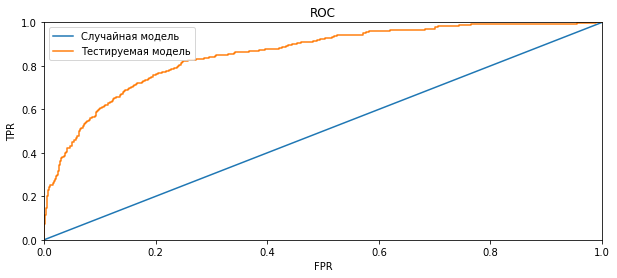

In [33]:
plt.figure();

plt.figure(figsize=(10,4))
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(('Случайная модель','Тестируемая модель'), loc= 'upper left') 
plt.show()

Отрисовали ROC кривую и получили roc auc score : 0.85, что значительно больше случайного порога в 0.5. модель предсказывает хорошо.

# Общий вывод

Был подготовлен датасет прогнозирования оттока клиентов. Данные были приведены к стилистической норме и убранны ненужные столбцы. 

Были исследованы модели  RandomForestClassifier, LogisticRegression и DecisionTreeClassifier. Лучшую модель показала RandomForestClassifier.

Попытался уменьшить и увеличить выборку не помогло.

Удалось достичь F1-меры F1_Score is: 0.6105919003115264.

Была отрисованна ROC кривая roc auc score : 0.85. 